In [1]:
# standard imports
import torch
import torch.nn as nn
from sklearn.datasets import make_moons
from generate2d import sample2d, energy2d

# FrEIA imports
import FrEIA.framework as Ff
import FrEIA.modules as Fm

BATCHSIZE = 1000
N_DIM = 2

# we define a subnet for use inside an affine coupling block
# for more detailed information see the full tutorial
def subnet_fc(dims_in, dims_out):
    return nn.Sequential(nn.Linear(dims_in, 512), nn.ReLU(),
                         nn.Linear(512,  dims_out))

# a simple chain of operations is collected by ReversibleSequential
inn = Ff.SequenceINN(N_DIM)
for k in range(8):
    inn.append(Fm.AllInOneBlock, subnet_constructor=subnet_fc, permute_soft=True)

optimizer = torch.optim.Adam(inn.parameters(), lr=0.001)

# a very basic training loop
for i in range(10000):
    optimizer.zero_grad()
    # sample data from the moons distribution
#     data, label = make_moons(n_samples=BATCHSIZE, noise=0.05)
    data = sample2d('8gaussians', BATCHSIZE)
    x = torch.Tensor(data)
    # pass to INN and get transformed variable z and log Jacobian determinant
    z, log_jac_det = inn(x)
    # calculate the negative log-likelihood of the model with a standard normal prior
    loss = 0.5*torch.sum(z**2, 1) - log_jac_det
    loss = loss.mean() / N_DIM
    # backpropagate and update the weights
    loss.backward()
    optimizer.step()
    
    if i % 100==0:
        print(i,loss)

0 tensor(2.3042, grad_fn=<DivBackward0>)
100 tensor(1.0923, grad_fn=<DivBackward0>)
200 tensor(0.9050, grad_fn=<DivBackward0>)
300 tensor(0.8461, grad_fn=<DivBackward0>)
400 tensor(0.8010, grad_fn=<DivBackward0>)
500 tensor(0.7321, grad_fn=<DivBackward0>)
600 tensor(0.8598, grad_fn=<DivBackward0>)
700 tensor(0.6881, grad_fn=<DivBackward0>)
800 tensor(0.6718, grad_fn=<DivBackward0>)
900 tensor(0.6661, grad_fn=<DivBackward0>)
1000 tensor(0.6573, grad_fn=<DivBackward0>)
1100 tensor(0.6480, grad_fn=<DivBackward0>)
1200 tensor(0.6324, grad_fn=<DivBackward0>)
1300 tensor(0.6625, grad_fn=<DivBackward0>)
1400 tensor(0.7029, grad_fn=<DivBackward0>)
1500 tensor(0.6561, grad_fn=<DivBackward0>)
1600 tensor(0.6390, grad_fn=<DivBackward0>)
1700 tensor(0.6785, grad_fn=<DivBackward0>)
1800 tensor(0.6556, grad_fn=<DivBackward0>)
1900 tensor(0.6414, grad_fn=<DivBackward0>)
2000 tensor(0.6201, grad_fn=<DivBackward0>)
2100 tensor(0.6241, grad_fn=<DivBackward0>)
2200 tensor(0.6108, grad_fn=<DivBackward0>)


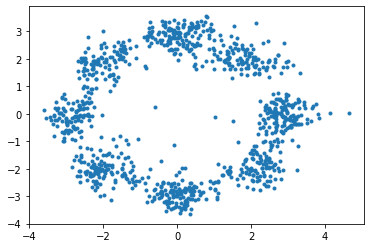

In [2]:
import matplotlib.pyplot as plt

# sample from the INN by sampling from a standard normal and transforming
# it in the reverse direction
z = torch.randn(BATCHSIZE, N_DIM)
samples, _ = inn(z, rev=True)

plt.plot(samples.detach().numpy()[:,0], samples.detach().numpy()[:,1],'.')


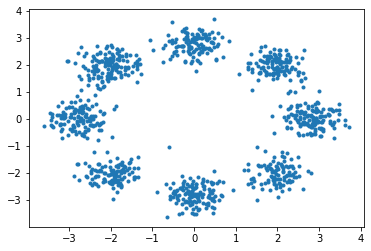

In [3]:
data = sample2d('8gaussians', 1000)
plt.plot(data[:,0],data[:,1],'.')

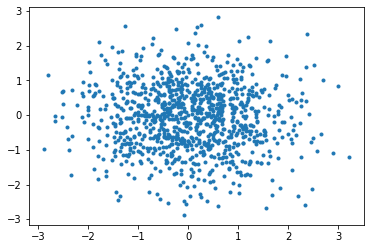

In [8]:
plt.plot(z[:,0],z[:,1],'.')

In [7]:
log_jac_det.size()

torch.Size([1000])